In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


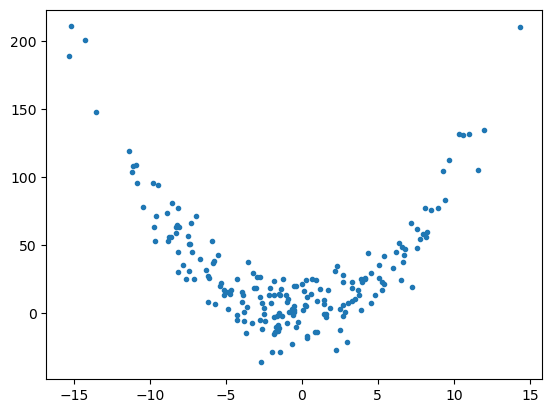

In [110]:
x = 6 * np.random.randn(200,1) - 0.3 #randn takes a sample of 200 numbers from normal distribution
#y = 0.9x2 + 0.8x + 2 + random noise -  polynomial equation
y = 0.9*x*x + 0.8*x  + 1 + 15*np.random.randn(200,1)
plt.plot(x,y,'.')

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [112]:
x_train.shape,x_test.shape

((160, 1), (40, 1))

### since features are not linear , best fit line drawn by linear regression do not capture the essence of our data i.e polynomial behavior

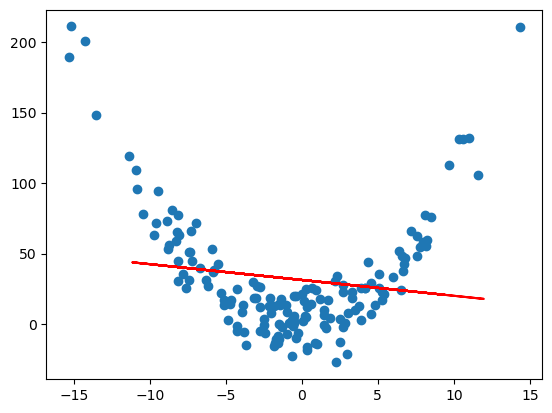

In [113]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.plot(x_train,y_train,'o')
plt.plot(x_test,y_pred,'r-')

### let's transform the features(not target variable) using polynomial class<br> 
Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [128]:
trans = PolynomialFeatures(degree=16,include_bias=True) #bias true adds x^0 term as well .i.e 1
x_train_trans = trans.fit_transform(x_train)
x_test_trans = trans.transform(x_test)
print(x_train[0])
print(x_train_trans[0])

[-6.14412314]
[ 1.00000000e+00 -6.14412314e+00  3.77502491e+01 -2.31942179e+02
  1.42508131e+03 -8.75587504e+03  5.37971744e+04 -3.30536464e+05
  2.03085674e+06 -1.24778339e+07  7.66653477e+07 -4.71041336e+08
  2.89413597e+09 -1.77819278e+10  1.09254354e+11 -6.71272204e+11
  4.12437908e+12]


In [129]:
trans.powers_ ,trans.n_input_features_,trans.n_output_features_

C:\Users\arsal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16]], dtype=int64),
 1,
 17)

0.7199599074717045

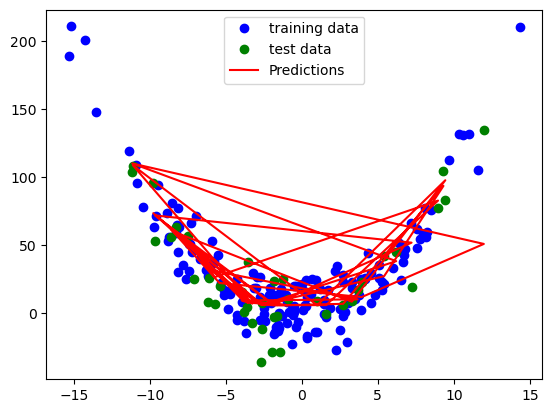

In [130]:
model = LinearRegression()
model.fit(x_train_trans,y_train)
y_pred = model.predict(x_test_trans)

plt.plot(x_train,y_train,'bo',label='training data',linewidth=3)
plt.plot(x_test,y_test,'go',label='test data')
plt.plot(x_test,y_pred,'r-',label='Predictions')
plt.legend(loc='upper center')
r2_score(y_test,y_pred)

In [67]:
model.coef_

array([[0.        , 0.80161365, 0.90060339]])

In [68]:
model.intercept_

array([0.98433165])

In [79]:
np.linspace(-1,1,10)#.ravel()

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [74]:
x[:5].reshape(1,5)

array([[  5.23698968,  -0.76912078, -13.33813618,   0.40465973,
         -5.81652   ]])